# Materiały dodatkowe
## Korelacja, grafy, regresja logistyczna, podstawy mierzenia jakości klasyfikatorów

### Korelacja

Dla dwóch zmiennych losowych $X_1,X_2$, korelacja mówi nam o tym, jak wiedza o wartościach $X_1$ wpływa na moją wiedzę o wartościach $X_2$ (i symetrycznie). (można rozumieć, że zmienne losowe to tutaj w założeniu "automaty" do losowania wartości liczbowych, losujemy je jak je obserwujemy. To jak często daną wartość przyjmie $X_1$ określa jej rozkład prawdopodobieństwa).

Jeśli $ cor(X_1, X_2 ) > 0 $ (zmienne są **dodatnio skorelowane**), to jeśli wiem, że $X_1$ jest duża, to $X_2$ prawdopodobnie też będzie duża.

Jeśli $ cor(X_1, X_2 ) <0 ) $, to gdy $X_1$ jest duże, to $X_2$ raczej będzie małe.

Jeśli mamy $ cor( X_1, X_2 )=0 $ to nic nie wiemy z powyższych. Nie oznacza to, że $X_1,X_2$ są niezależne statystycznie, jest to bardziej szczegółowy warunek, ale odwrotna zależność już jest (niezależność implikuje brak korelacji).

Generalnie, współczynnik korelacji przyjmuje wartości od -1 do 1.

**W praktyce:** w danych mamy obserwacje (można powiedzieć wyniki losowania). Korelacje liczymy na podstawie statystyk (funkcji w **R** :) ).

### Korelacja Pearsona i Spearmana

Podstawową korelację określa współczynnik korelacji Pearsona i ma ona prostą interpretację graficzną. Dane z niezerową korelacją powinny leżeć na prostej w przestrzeni 2D.

Korelacja Spearmana to korelacja Pearsona liczona na rangach, co z kolei powoduje, że określa ona siłę zależności **dowolnej relacji monotonicznej między** $X_1, X_2 $.

In [5]:
X_1= rnorm(1000)
X_2= 3*X_1 + rnorm(1000,0,0.25)
X_3=-X_2
X_4= X_2^3 + X_1^5
X_5=-X_4
X_matrix= cbind(X_1,X_2,X_3,X_4,X_5)

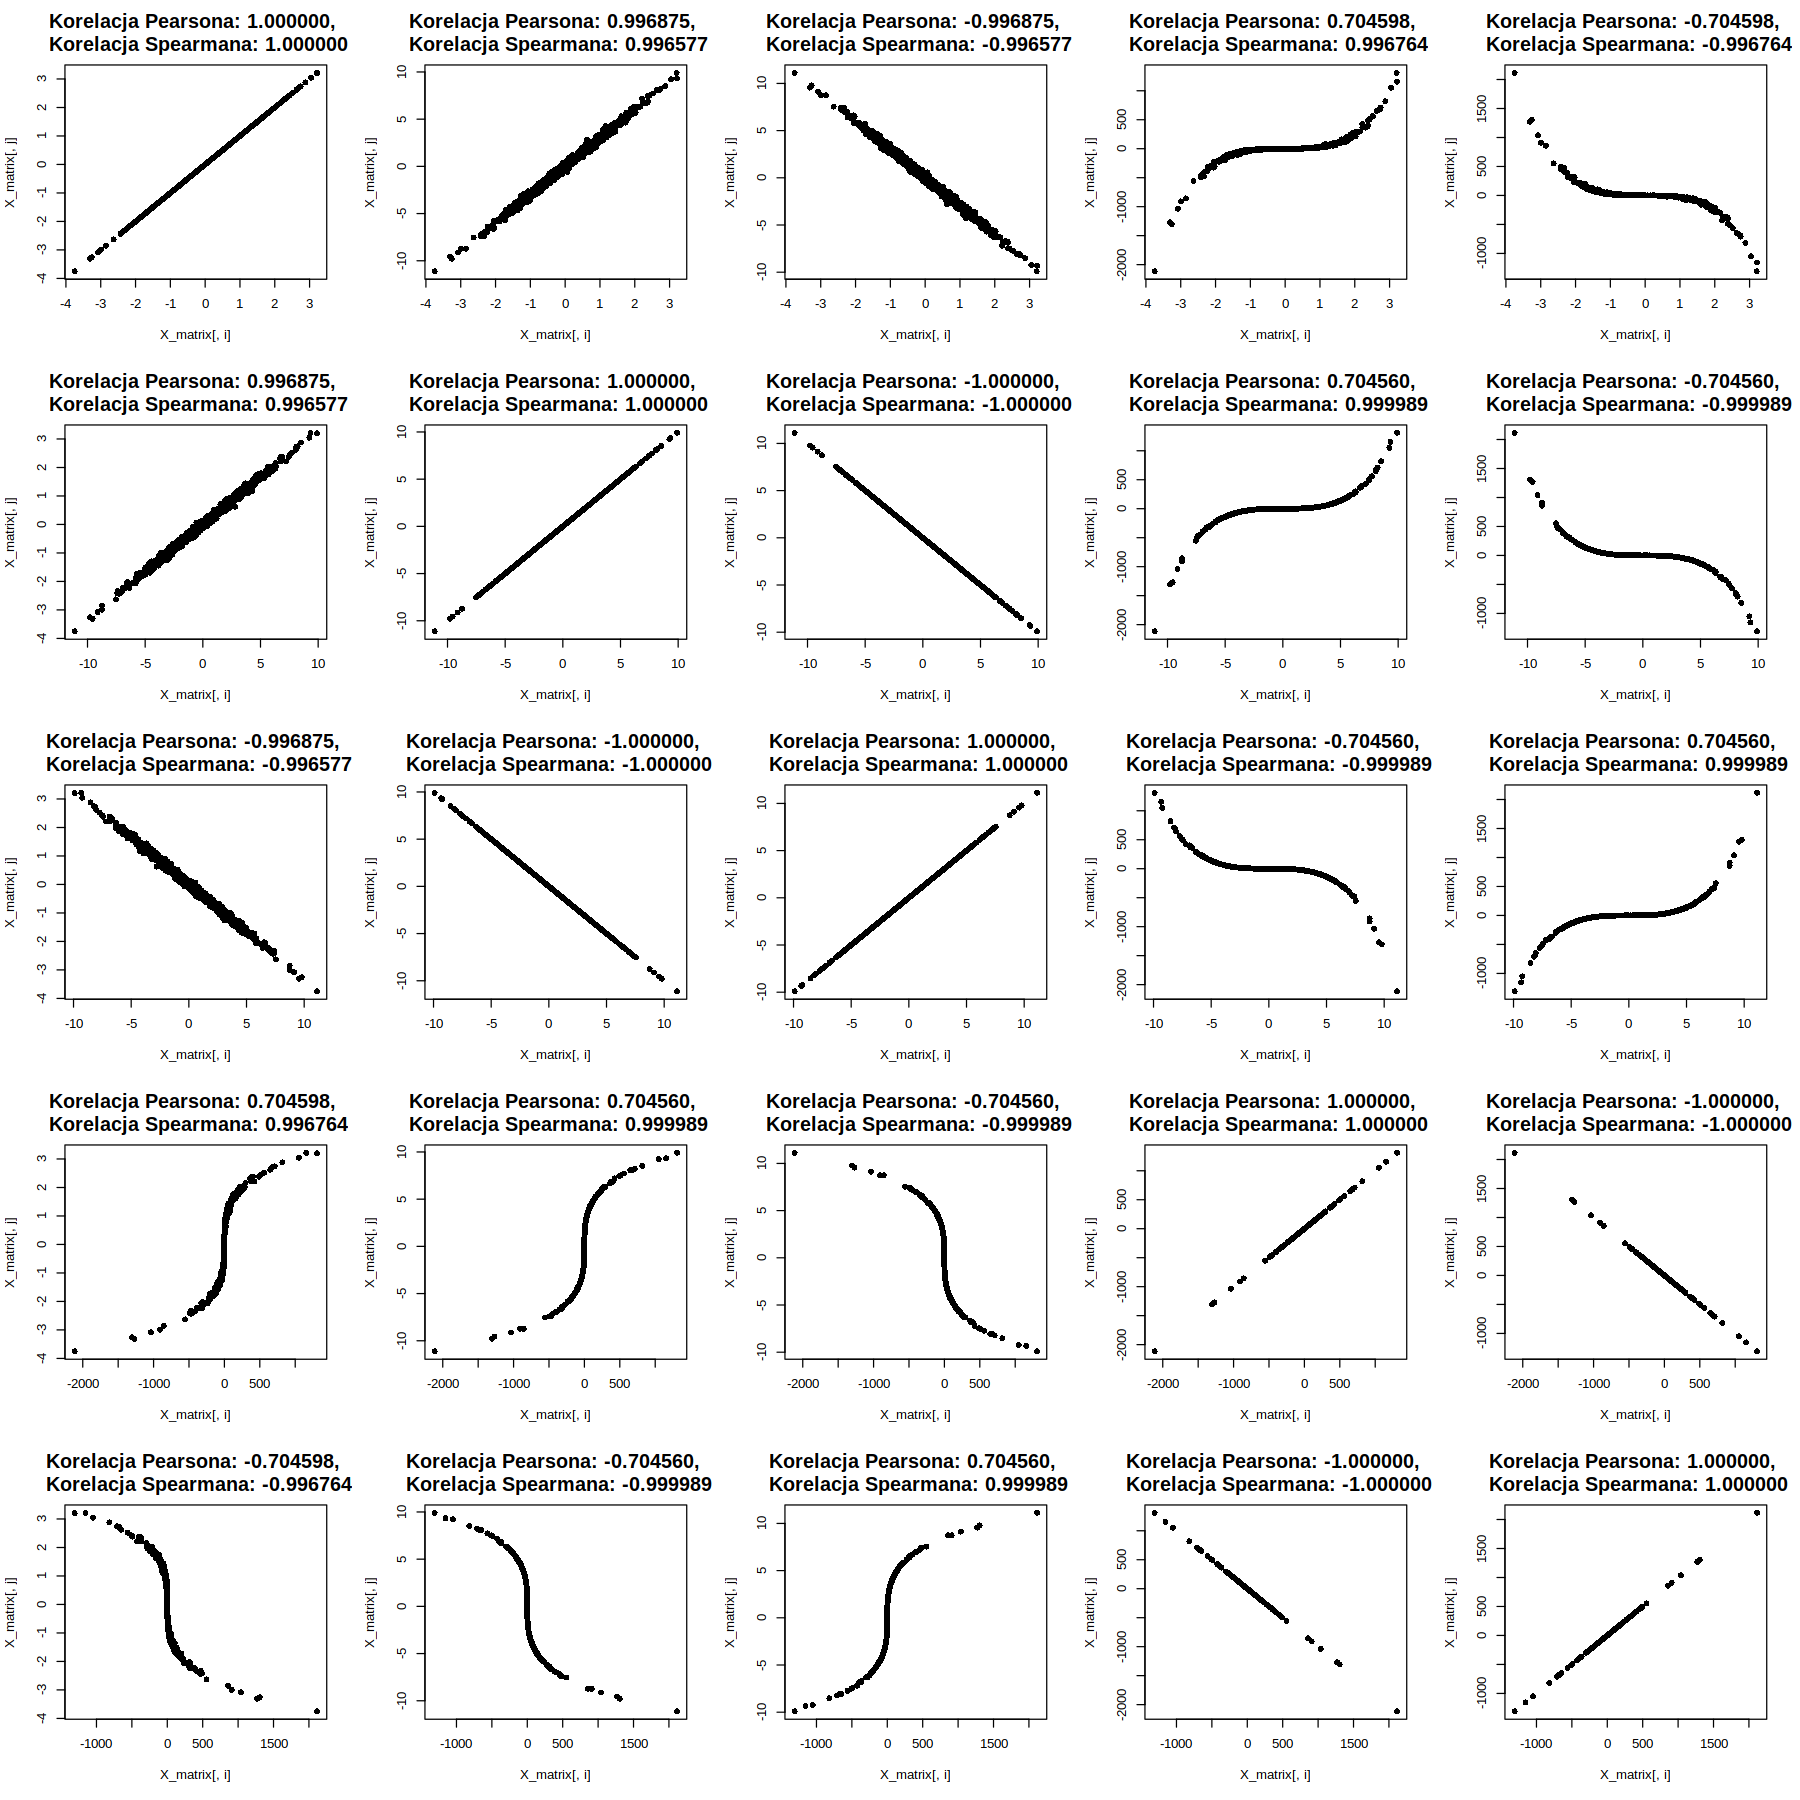

In [19]:
options(repr.plot.width=15, repr.plot.height=15)
par(mfrow=c(5,5))
for (i in 1:5)
for (j in 1:5)
    {
    plot(X_matrix[,i], X_matrix[,j], pch=16, cex.main=1.5,
         main=sprintf("Korelacja Pearsona: %f, \n Korelacja Spearmana: %f", cor(X_matrix[,i],
                                                                             X_matrix[,j]),
                                                                          cor(X_matrix[,i],
                                                                             X_matrix[,j],
                                                                             method="spearman")
                     )
        )
    }

### Macierz korelacji

To sposób opisu zbioru danych $X$ wymiaru $m \times n$ w postaci macierzy $ n \times n$ korelacji pomiędzy poszczególnymi $n$ zmiennymi w zbiorze.

In [20]:
cor(X_1,X_2)  #korelacja 2 wektorów

[1] 0.9968748

In [21]:
cor(X_1, X_matrix) #korelacja wektora i macierzy

X_1,X_2,X_3,X_4,X_5
1,0.9968748,-0.9968748,0.7045978,-0.7045978


In [22]:
cor(X_matrix) #korelacja każdy-z-każdym pomiędzy wszystkimi zmiennymi

,X_1,X_2,X_3,X_4,X_5
X_1,1.0000000,0.9968748,-0.9968748,0.7045978,-0.7045978
X_2,0.9968748,1.0000000,-1.0000000,0.7045597,-0.7045597
X_3,-0.9968748,-1.0000000,1.0000000,-0.7045597,0.7045597
X_4,0.7045978,0.7045597,-0.7045597,1.0000000,-1.0000000
X_5,-0.7045978,-0.7045597,0.7045597,-1.0000000,1.0000000


In [23]:
cor(X_matrix, method='spearman') #korelacja Spearmana

,X_1,X_2,X_3,X_4,X_5
X_1,1.0000000,0.9965766,-0.9965766,0.9967638,-0.9967638
X_2,0.9965766,1.0000000,-1.0000000,0.9999886,-0.9999886
X_3,-0.9965766,-1.0000000,1.0000000,-0.9999886,0.9999886
X_4,0.9967638,0.9999886,-0.9999886,1.0000000,-1.0000000
X_5,-0.9967638,-0.9999886,0.9999886,-1.0000000,1.0000000


## Grafy

Graf to prosty obiekt złożony ze zbioru wierzchołków oraz krawędzi, które łączą co niektóre wierzchołki.

Prosty graf nieważony odwzorowuje **macierz sąsiedztwa** $A$:

In [25]:

#robimy przykładowy graf z macierzy zer i jedynek
#A[i,j]==1, gdy wierzchołek i oraz j są połączone, 0 inaczej
#A zatem jest symetryczna
A= (cor(X_matrix) > 0.6)*1
diag(A) <- 0 #zerujemy przekątną
A

,X_1,X_2,X_3,X_4,X_5
X_1,0,1,0,1,0
X_2,1,0,0,1,0
X_3,0,0,0,0,1
X_4,1,1,0,0,0
X_5,0,0,1,0,0


### igraph

Przydatna biblioteka do analizy grafów.

In [31]:
require(igraph)
G_x<- graph_from_adjacency_matrix(A,mode = "undirected") 

Ten graf ma **2 połączone komponenty**:

- złożony z $X_3, X_5$,

- złożony z $X_1,_X2,X_4$

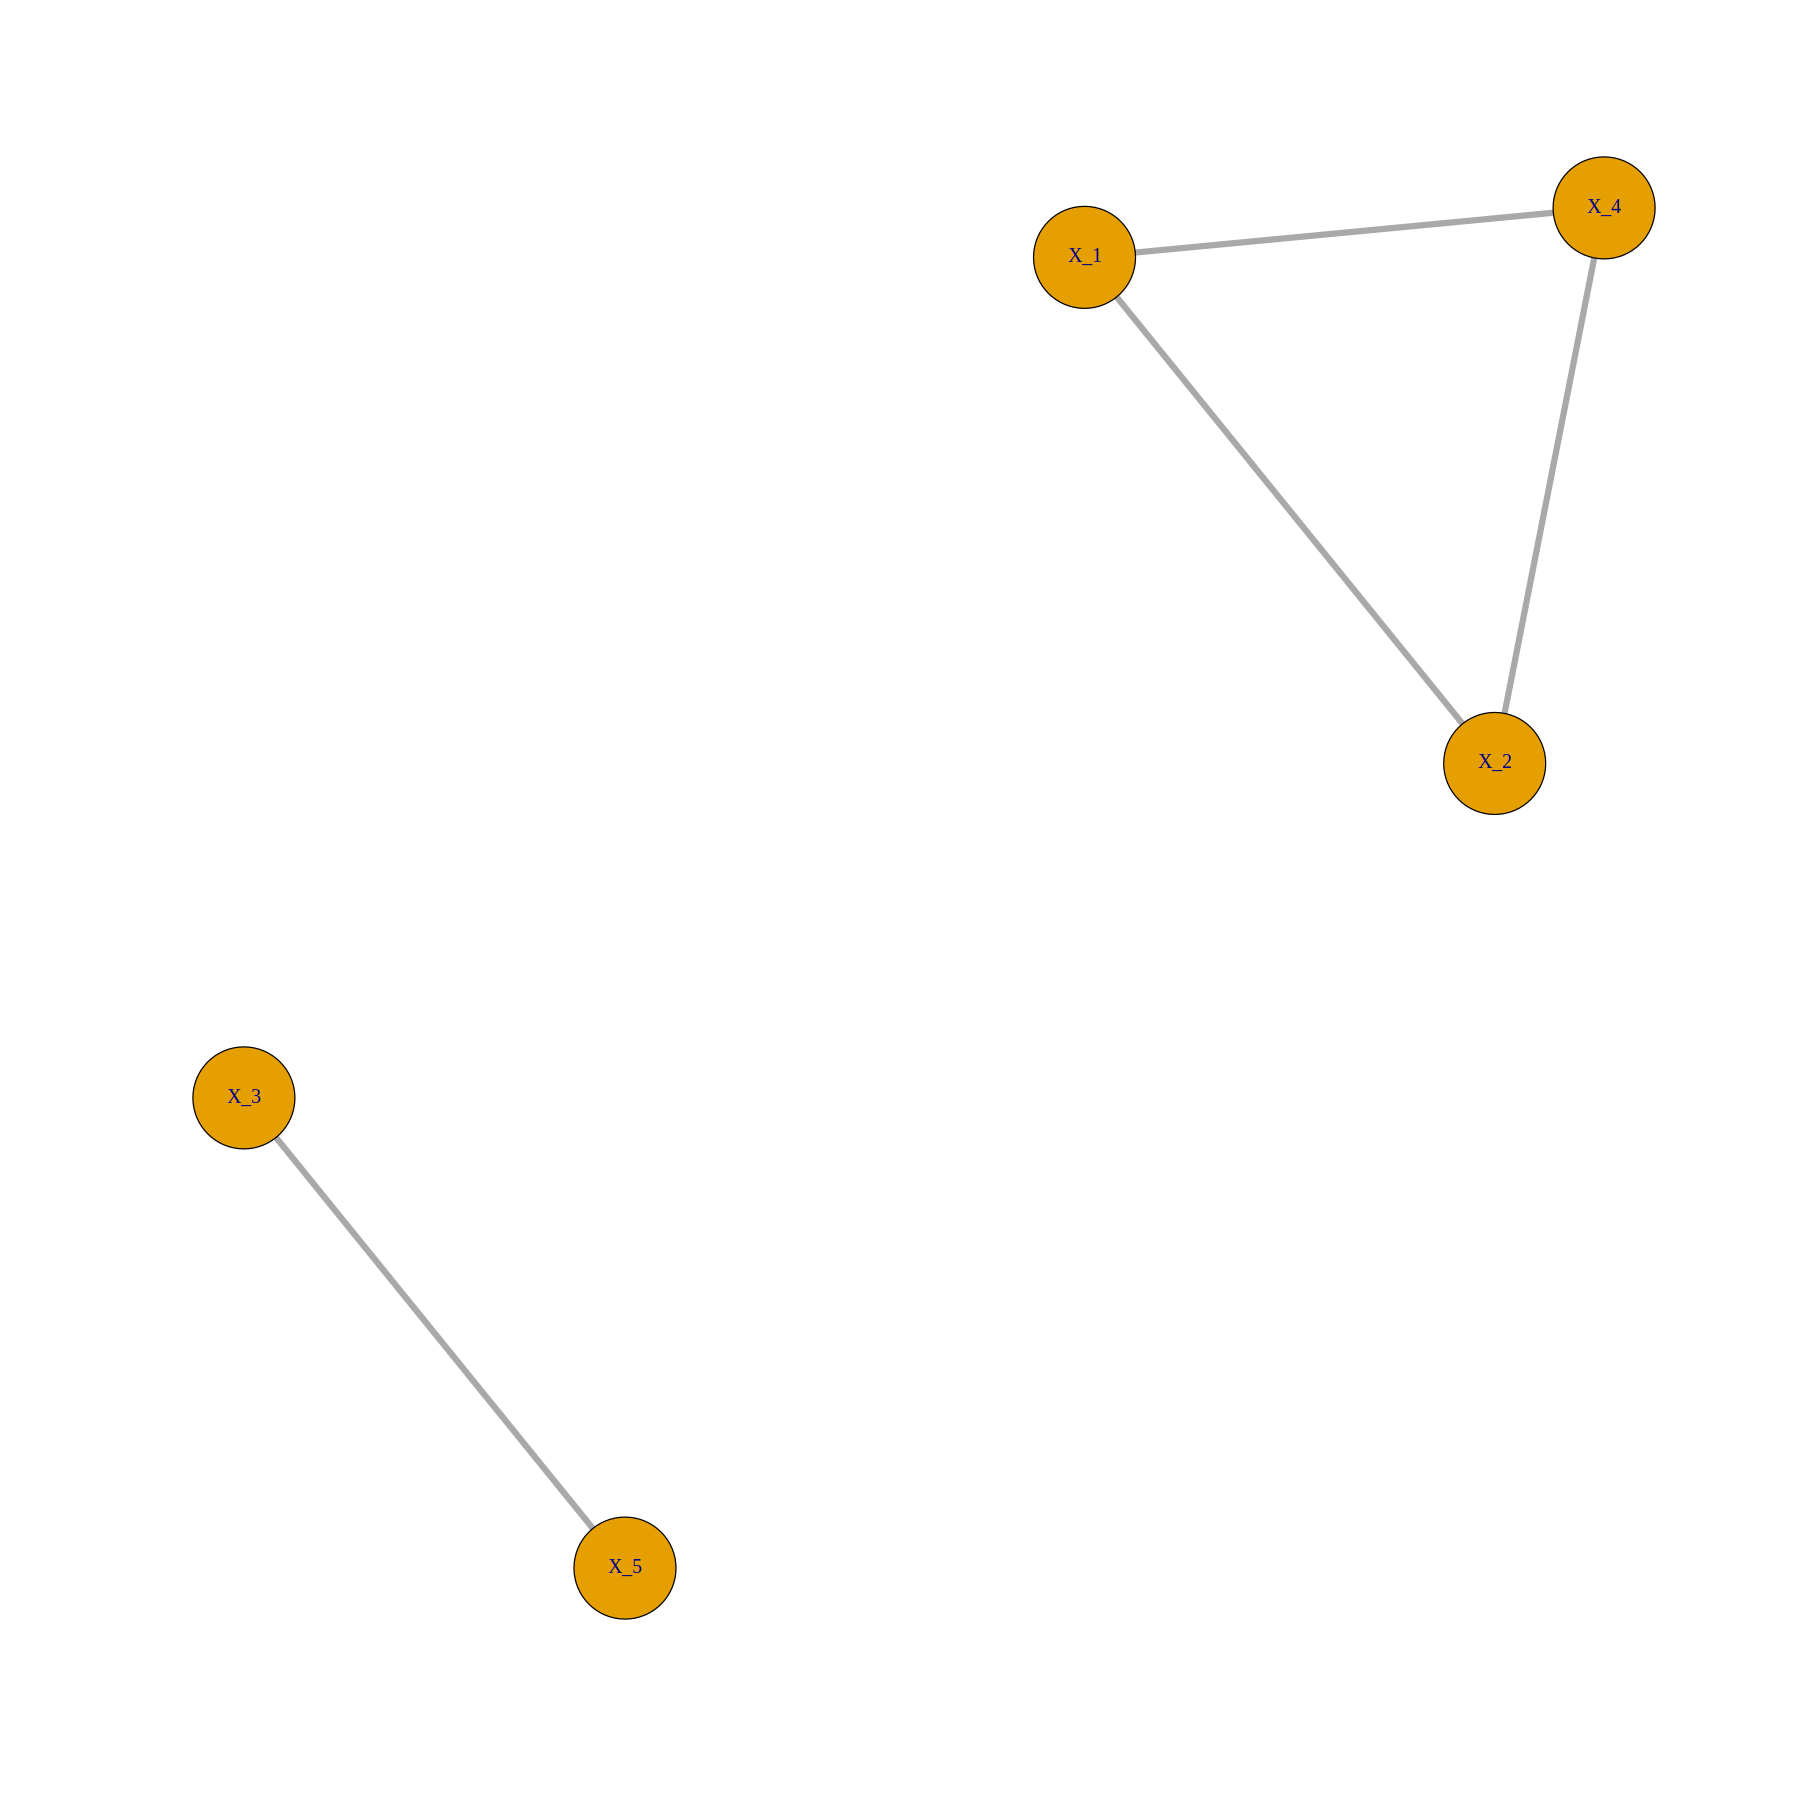

In [34]:
plot(G_x, edge.width=5)

In [35]:
components(G_x) #funkcja z igraph licząca komponenty grafu

#membership - wektor określający, do którego komponentu wierzchołek należy
#csize- rozmiar danego komponentu w liczbie wierzchołków
#no - liczba komponentów

$membership
X_1 X_2 X_3 X_4 X_5 
  1   1   2   1   2 

$csize
[1] 3 2

$no
[1] 2

### Stopień wierchołka i

To liczba połączeń, lub naczej $ \large \sum_j A_{ij} $

### Laplacjan grafu G

To macierz $ \large L = A - D $, gdzie $D$ to macierz diagonalna (0 wszędzie tylko nie na przekątnej) $ \large D_{ii}= \sum_j A_{ij} $.

Okazuje się, że **wymiarowość jądra/ przestrzeni zerowej (kernel/nullspace, algebra liniowa)** macierzy $ \large L $ jest równa liczbie połączonych komponentów grafu opisanego przez $ \large A $. Akurat tutaj wymiarowość oznacza, że mamy maksymlanie 2 niezależne liniowo wektory $v$ takie, że $ L v = 0$.

#### Przypomnienie po krótce - algebra

**Nullspace** macierzy $ \large L $ to przestrzeń takich wektorów $v$, że $\large L v = 0 $.

Inne pojęcie: **wartość własna** (eigenvalue) macierzy $ \large L $ to taka liczba $c$, że $ \large L v = c v $ dla jakiegoś wektora $ v $. Ten $ v $ dla tego danego $ c $ to wektor własny (eigenwektor).

### Zastosowanie Laplacjanu
Zatem $ \large L $ ma tyle eigenwartości zerowych, ile graf mu odpowiadający ma połączonych komponentów. Idąc dalej - załóżmy, że mamy 2 zerowe eigenwartości. Zastępując w analizie macierz $A$ wymiaru $ n \times n$ macierzą $V$ wymiaru $n \times 2$, gdzie kolumnami $V$ są 2 liniowo niezależne eigenwektory długości $n$ odpowiadające pierwszym 2 zerowym eigenwartościom, możemy odczytać połączone komponenty grafu $G$ ( $\large V_{ik} \neq 0 $ jeżeli wierzchołek $n$ należy do komponentu $k$).

#### Przykład:

Po pierwsze - gotowa funkcja, licząca nullspace, tak jak trzeba. Po korekcie drobnycho odstępstw numerycznych uzyskamy macierz $V$.

In [111]:
library(pracma)       
NullSpace <- function (A) {
  m <- dim(A)[1]; n <- dim(A)[2]
  ## QR factorization and rank detection
  QR <- base::qr.default(A)
  r <- QR$rank
  ## cases 2 to 4
  if ((r < min(m, n)) || (m < n)) {
    R <- QR$qr[1:r, , drop = FALSE]
    P <- QR$pivot
    F <- R[, (r + 1):n, drop = FALSE]
    I <- base::diag(1, n - r)
    B <- -1.0 * base::backsolve(R, F, r)
    Y <- base::rbind(B, I)
    X <- Y[base::order(P), , drop = FALSE]
    return(X)
    }
  ## case 1
  return(base::matrix(0, n, 1))
  }

In [112]:
A

,X_1,X_2,X_3,X_4,X_5
X_1,0,1,0,1,0
X_2,1,0,0,1,0
X_3,0,0,0,0,1
X_4,1,1,0,0,0
X_5,0,0,1,0,0


In [113]:
D= diag(colSums(A))
D

2,0,0,0,0
0,2,0,0,0
0,0,1,0,0
0,0,0,2,0
0,0,0,0,1


In [114]:
L= A - D
L

,X_1,X_2,X_3,X_4,X_5
X_1,-2,1,0,1,0
X_2,1,-2,0,1,0
X_3,0,0,-1,0,1
X_4,1,1,0,-2,0
X_5,0,0,1,0,-1


In [115]:
V<- NullSpace(L)
V

1,0
1,0
0,1
1,0
0,1


In [118]:
ComponentIndicatorMatrix<- ( V >=1e-5 )*1.  # to będzie konieczne na prawdziwych danych z powodu możliwych błędów numerycznych
ComponentIndicatorMatrix   # tego już można użyć do sprawdzania komponentu, do którego należy dany wierzchołek

1,0
1,0
0,1
1,0
0,1


In [119]:
#dobrze porównać wyniki przykładu z rysunkiem i macierzą A
A

,X_1,X_2,X_3,X_4,X_5
X_1,0,1,0,1,0
X_2,1,0,0,1,0
X_3,0,0,0,0,1
X_4,1,1,0,0,0
X_5,0,0,1,0,0


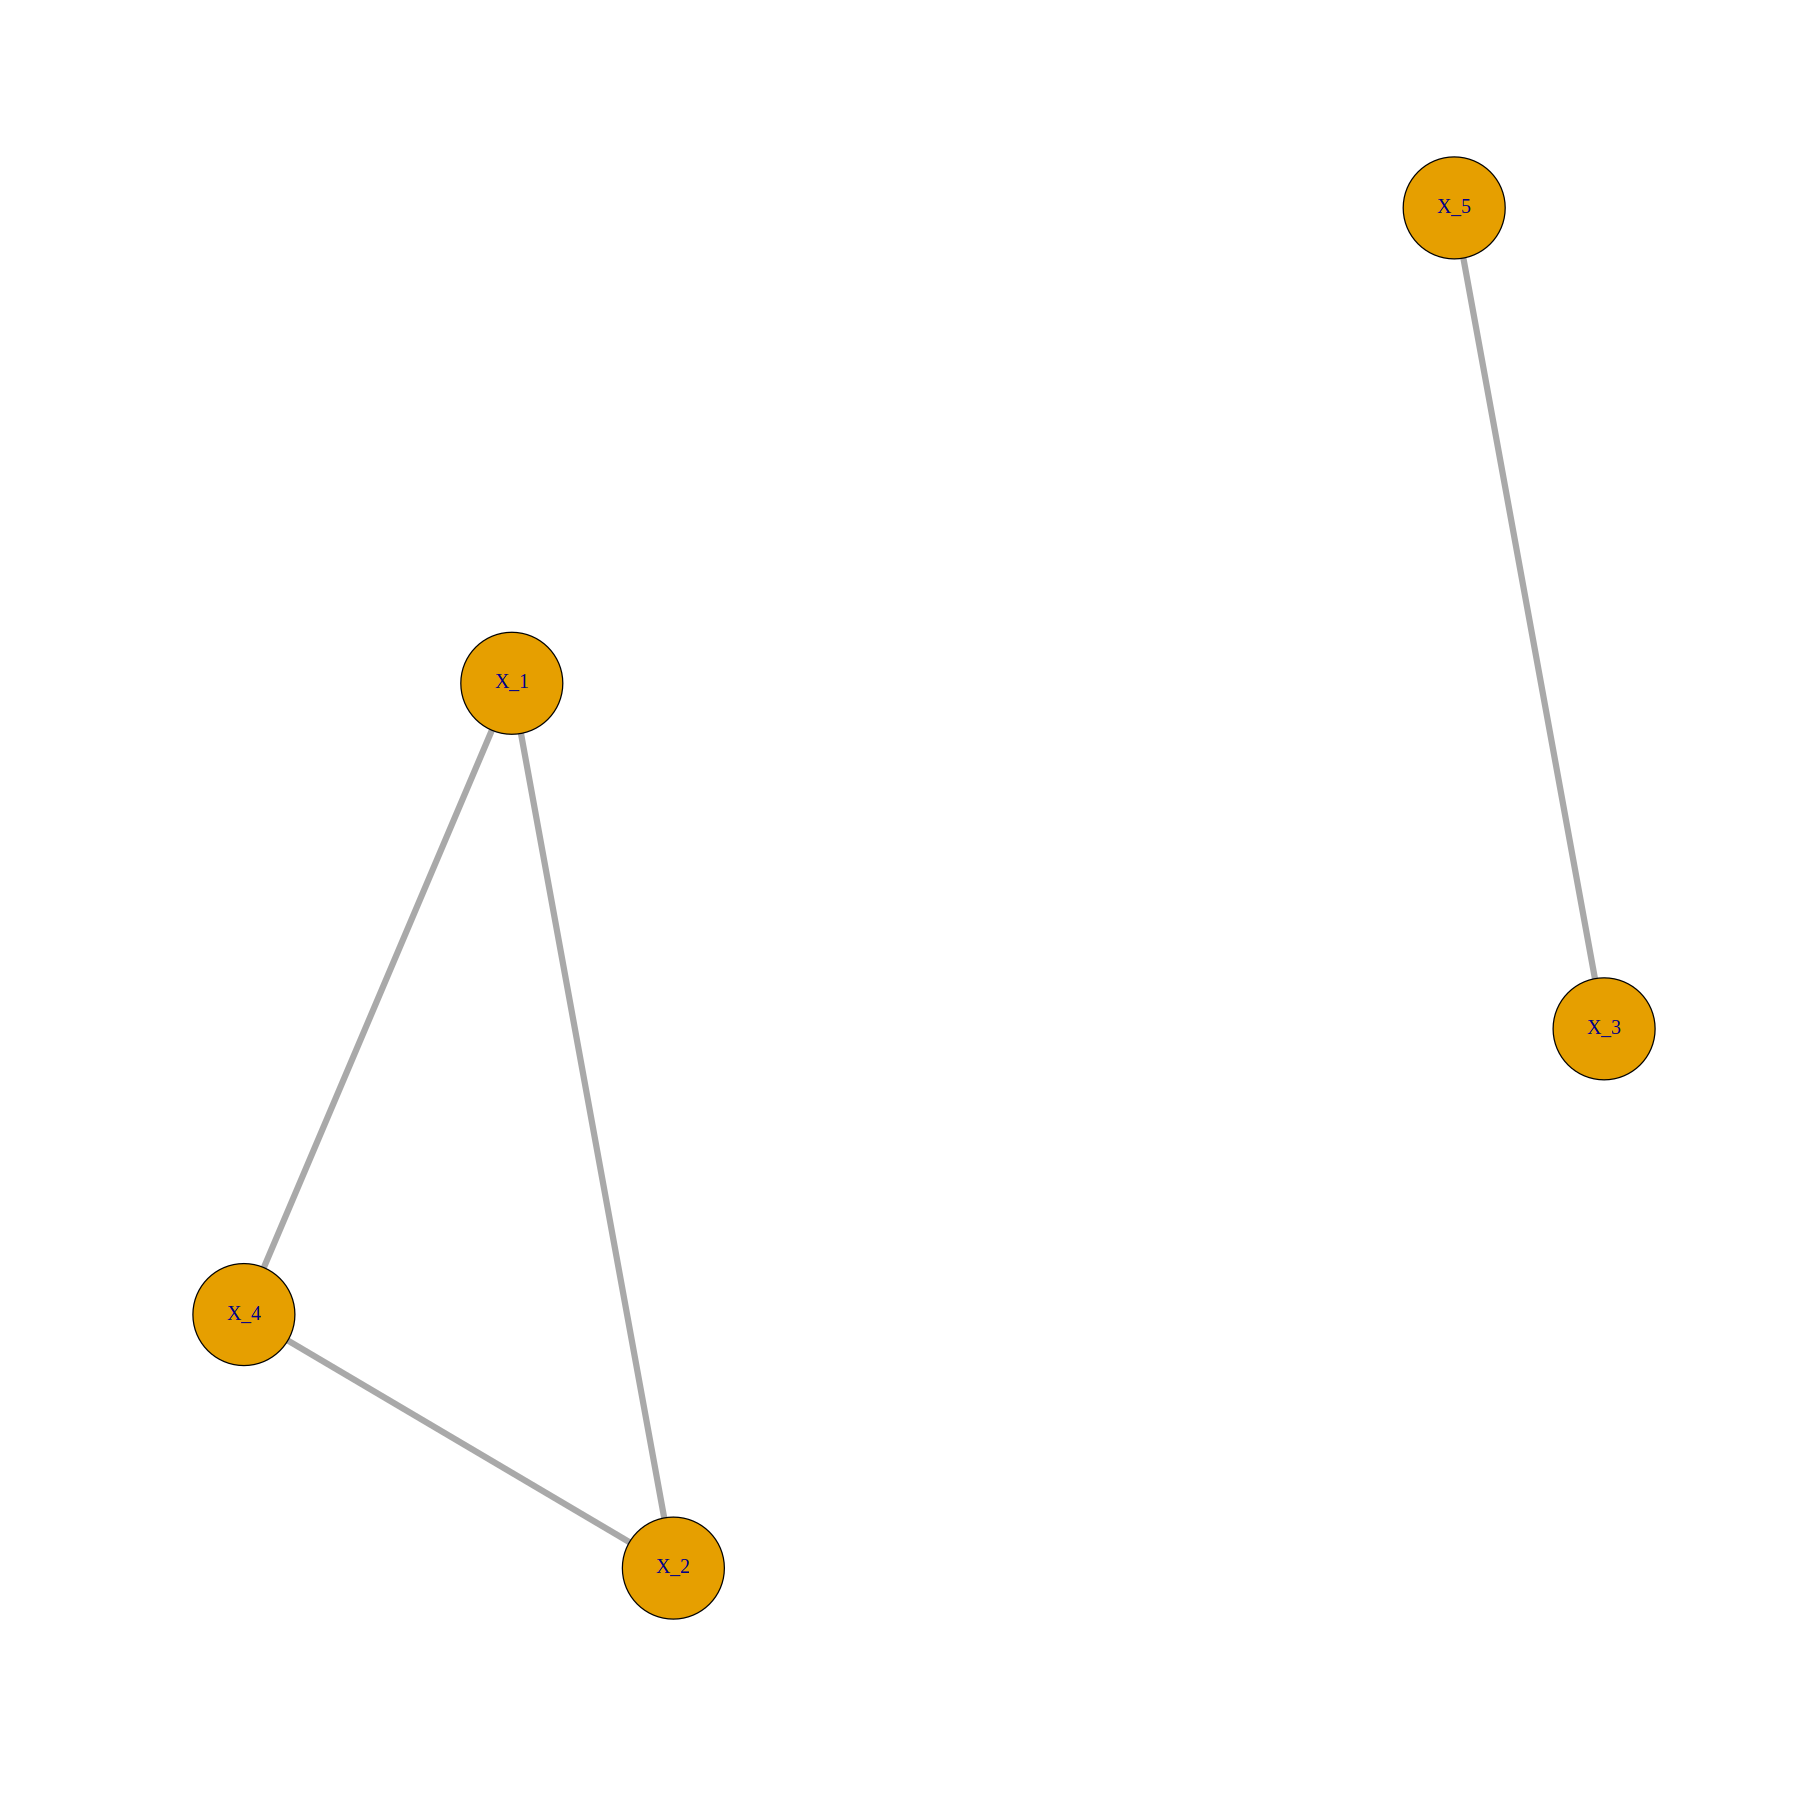

In [120]:
plot(G_x, edge.width=5)

## PCA i SVD

$PCA$ (analiza głównych składowych) to technika analityczna pozwalająca na redukcję wymiarowości zbioru danych. 

Na wejściu, mamy zbiór danych wymiaru $m \times n$, $n$ prawdopodobnie duże. Na wyjściu - dostajemy zbiór danych opisujący te same obserwacje, ale za pomocą zazwyczaj mniejszej liczby zmiennych $p$, zwanych głównymi składowymi.

Główne składowe znowu mają prostą interpretację algebraiczną. Jak mamy $N$ zmiennych i $M$ obserwacji, możemy to traktować jako zbiór $M$ wektorów w przestrzeni $ND$. W $PCA$, obracamy układ współrzędny tak, aby pierwsze osie nowego układu niosły jak najwięcej informacji o danych. Odpowiada to obliczeniu projekcji na eigenwektory macierzy kowariancji układu... W praktyce: stosujemy rozkład $SVD$ na macierzy z danymi $X$:

$X= U \Xi V $

$ m \times n = m \times n * n \times n * m \times m $

Wartości singularne (singular values) znajdują się w macierzy diagonalnej $\Xi$. Okazuje się, że pierwsze $k$ głównych składowych powstanie, jak przemnożymy pierwsze $k$ kolumn $U$ macierzowo przez wycinek $k \times k$ macierzy $ \Xi $:

$  \large PCs^{1 \dots k}_{1 \dots m} = U^{1 \dots k}_{1 \dots m} \Xi^{1 \dots k}_{1 \dots k} $.

Kod:

In [140]:
# konstrukcja bardziej obrazowego przykładu danych pod PCA
dataSize=length(X_matrix)
dataDim=dim(X_matrix)
Noise<-  rnorm(dataSize,0,1.5)
dim(Noise)<-dataDim
X_train<- X_matrix + Noise

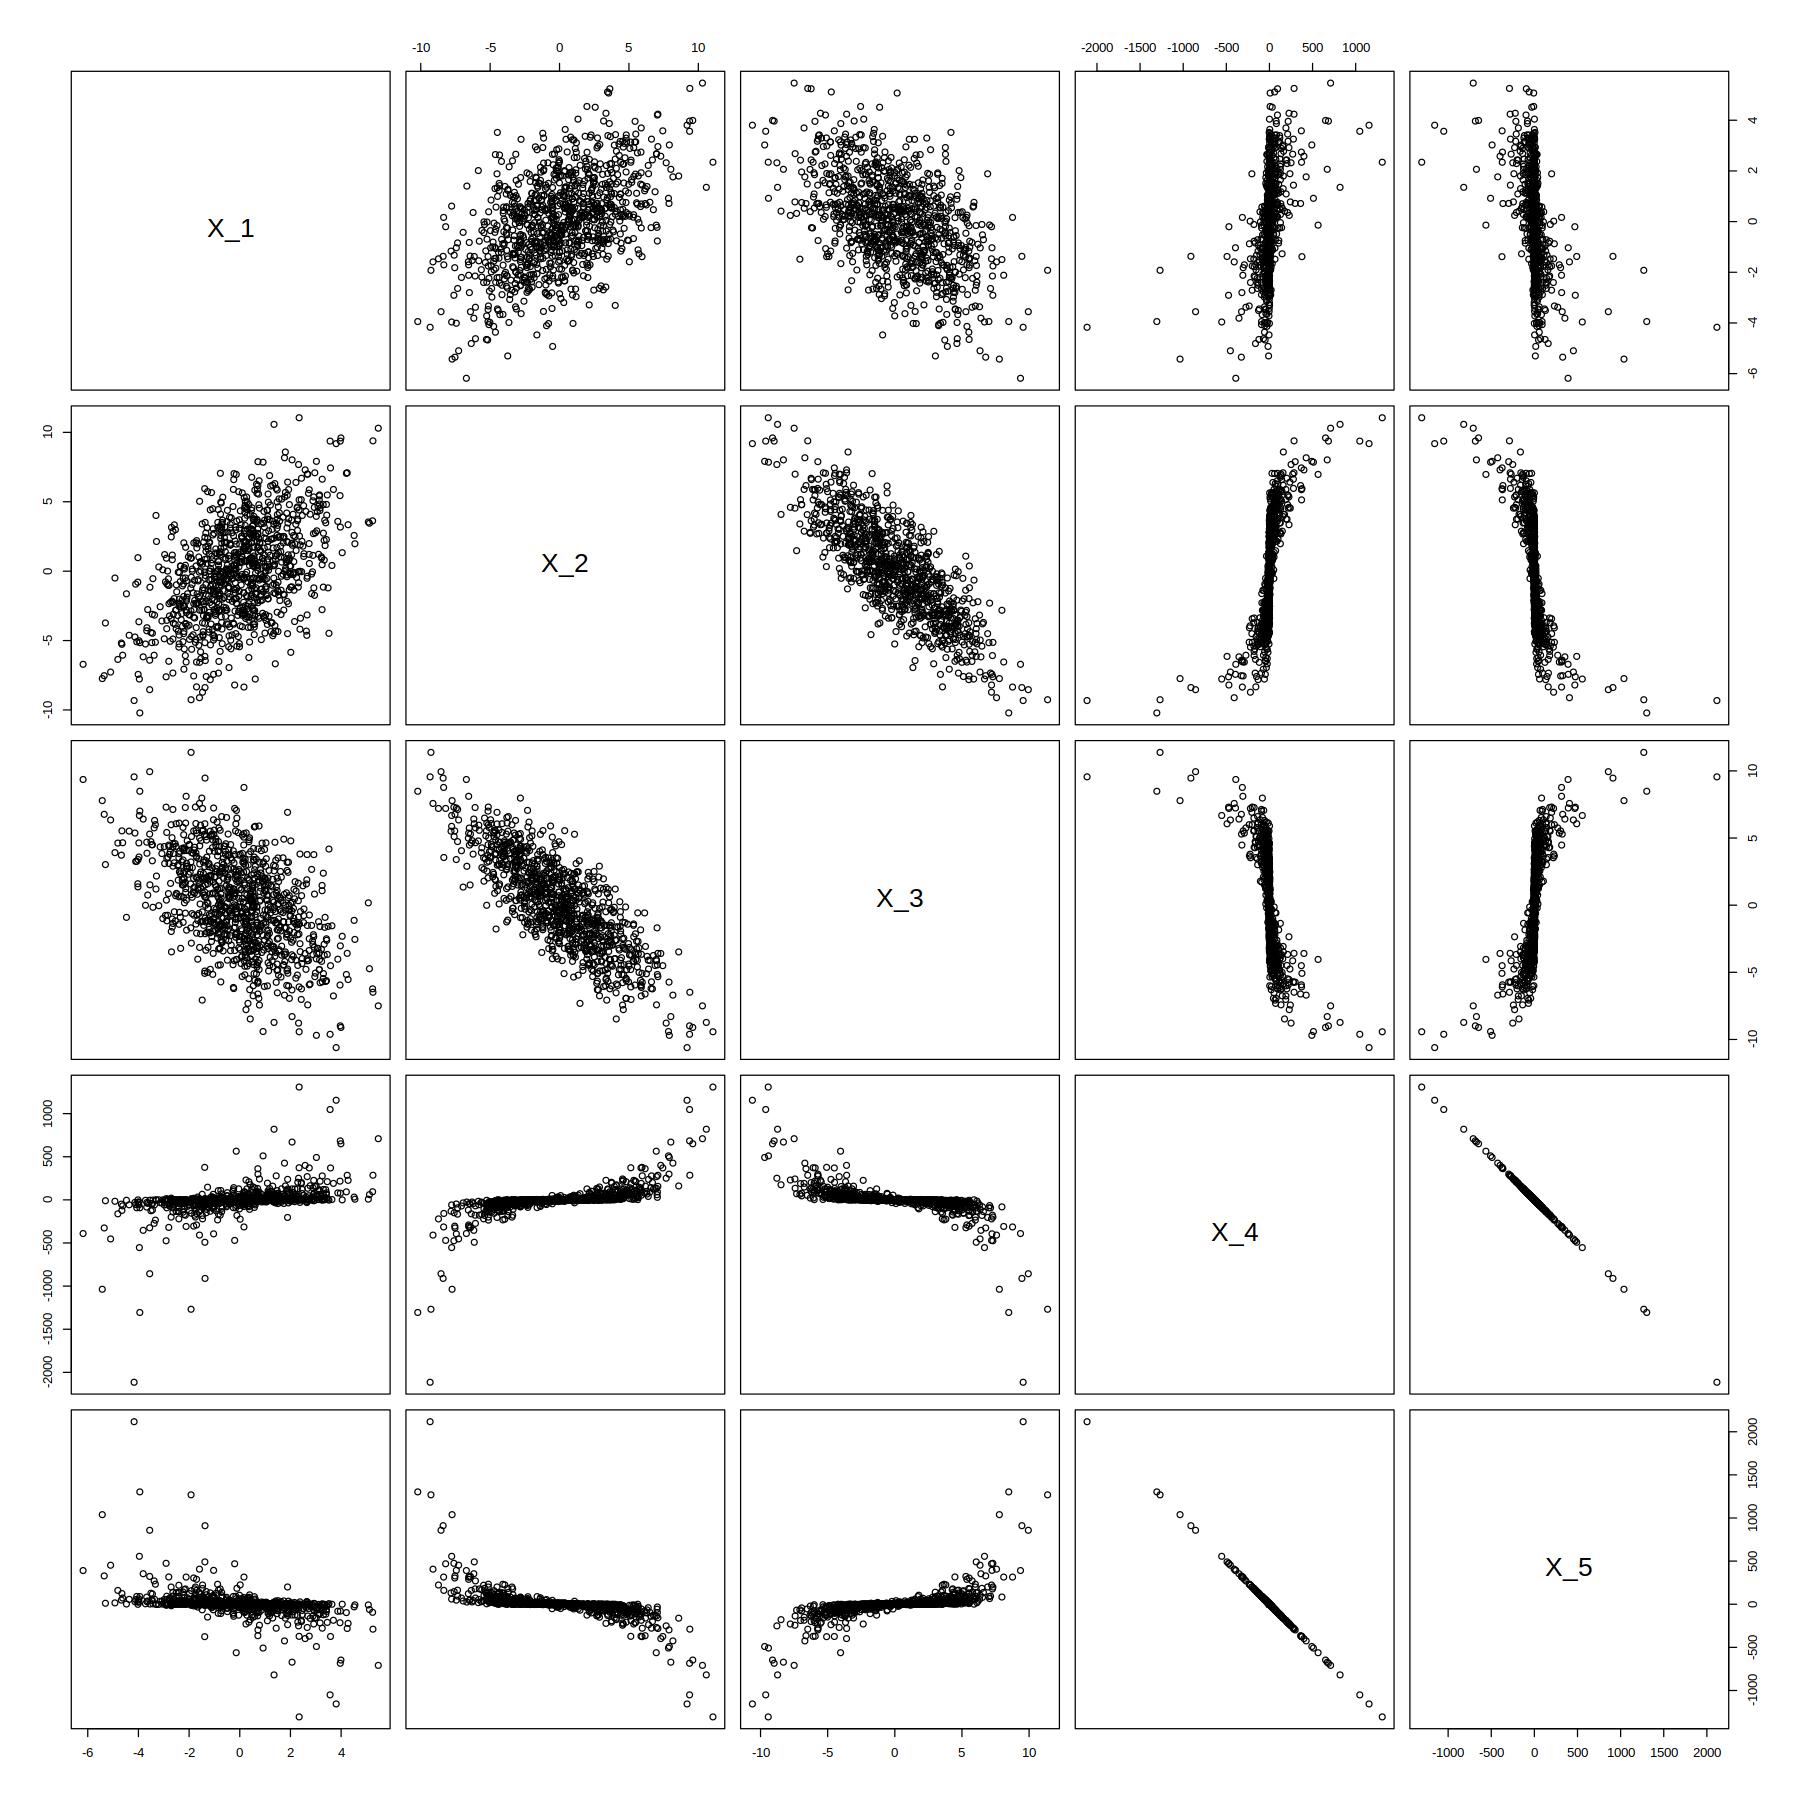

In [141]:
plot(as.data.frame(X_train))

In [142]:

X_SVD<-svd(X_train)

In [143]:
# wszystkie główne składowe to U %*% D

U<-X_SVD$u
D<- diag(X_SVD$d)
PCs= U %*% D


In [144]:
dim(X_train)
dim(PCs)


[1] 1000    5

[1] 1000    5

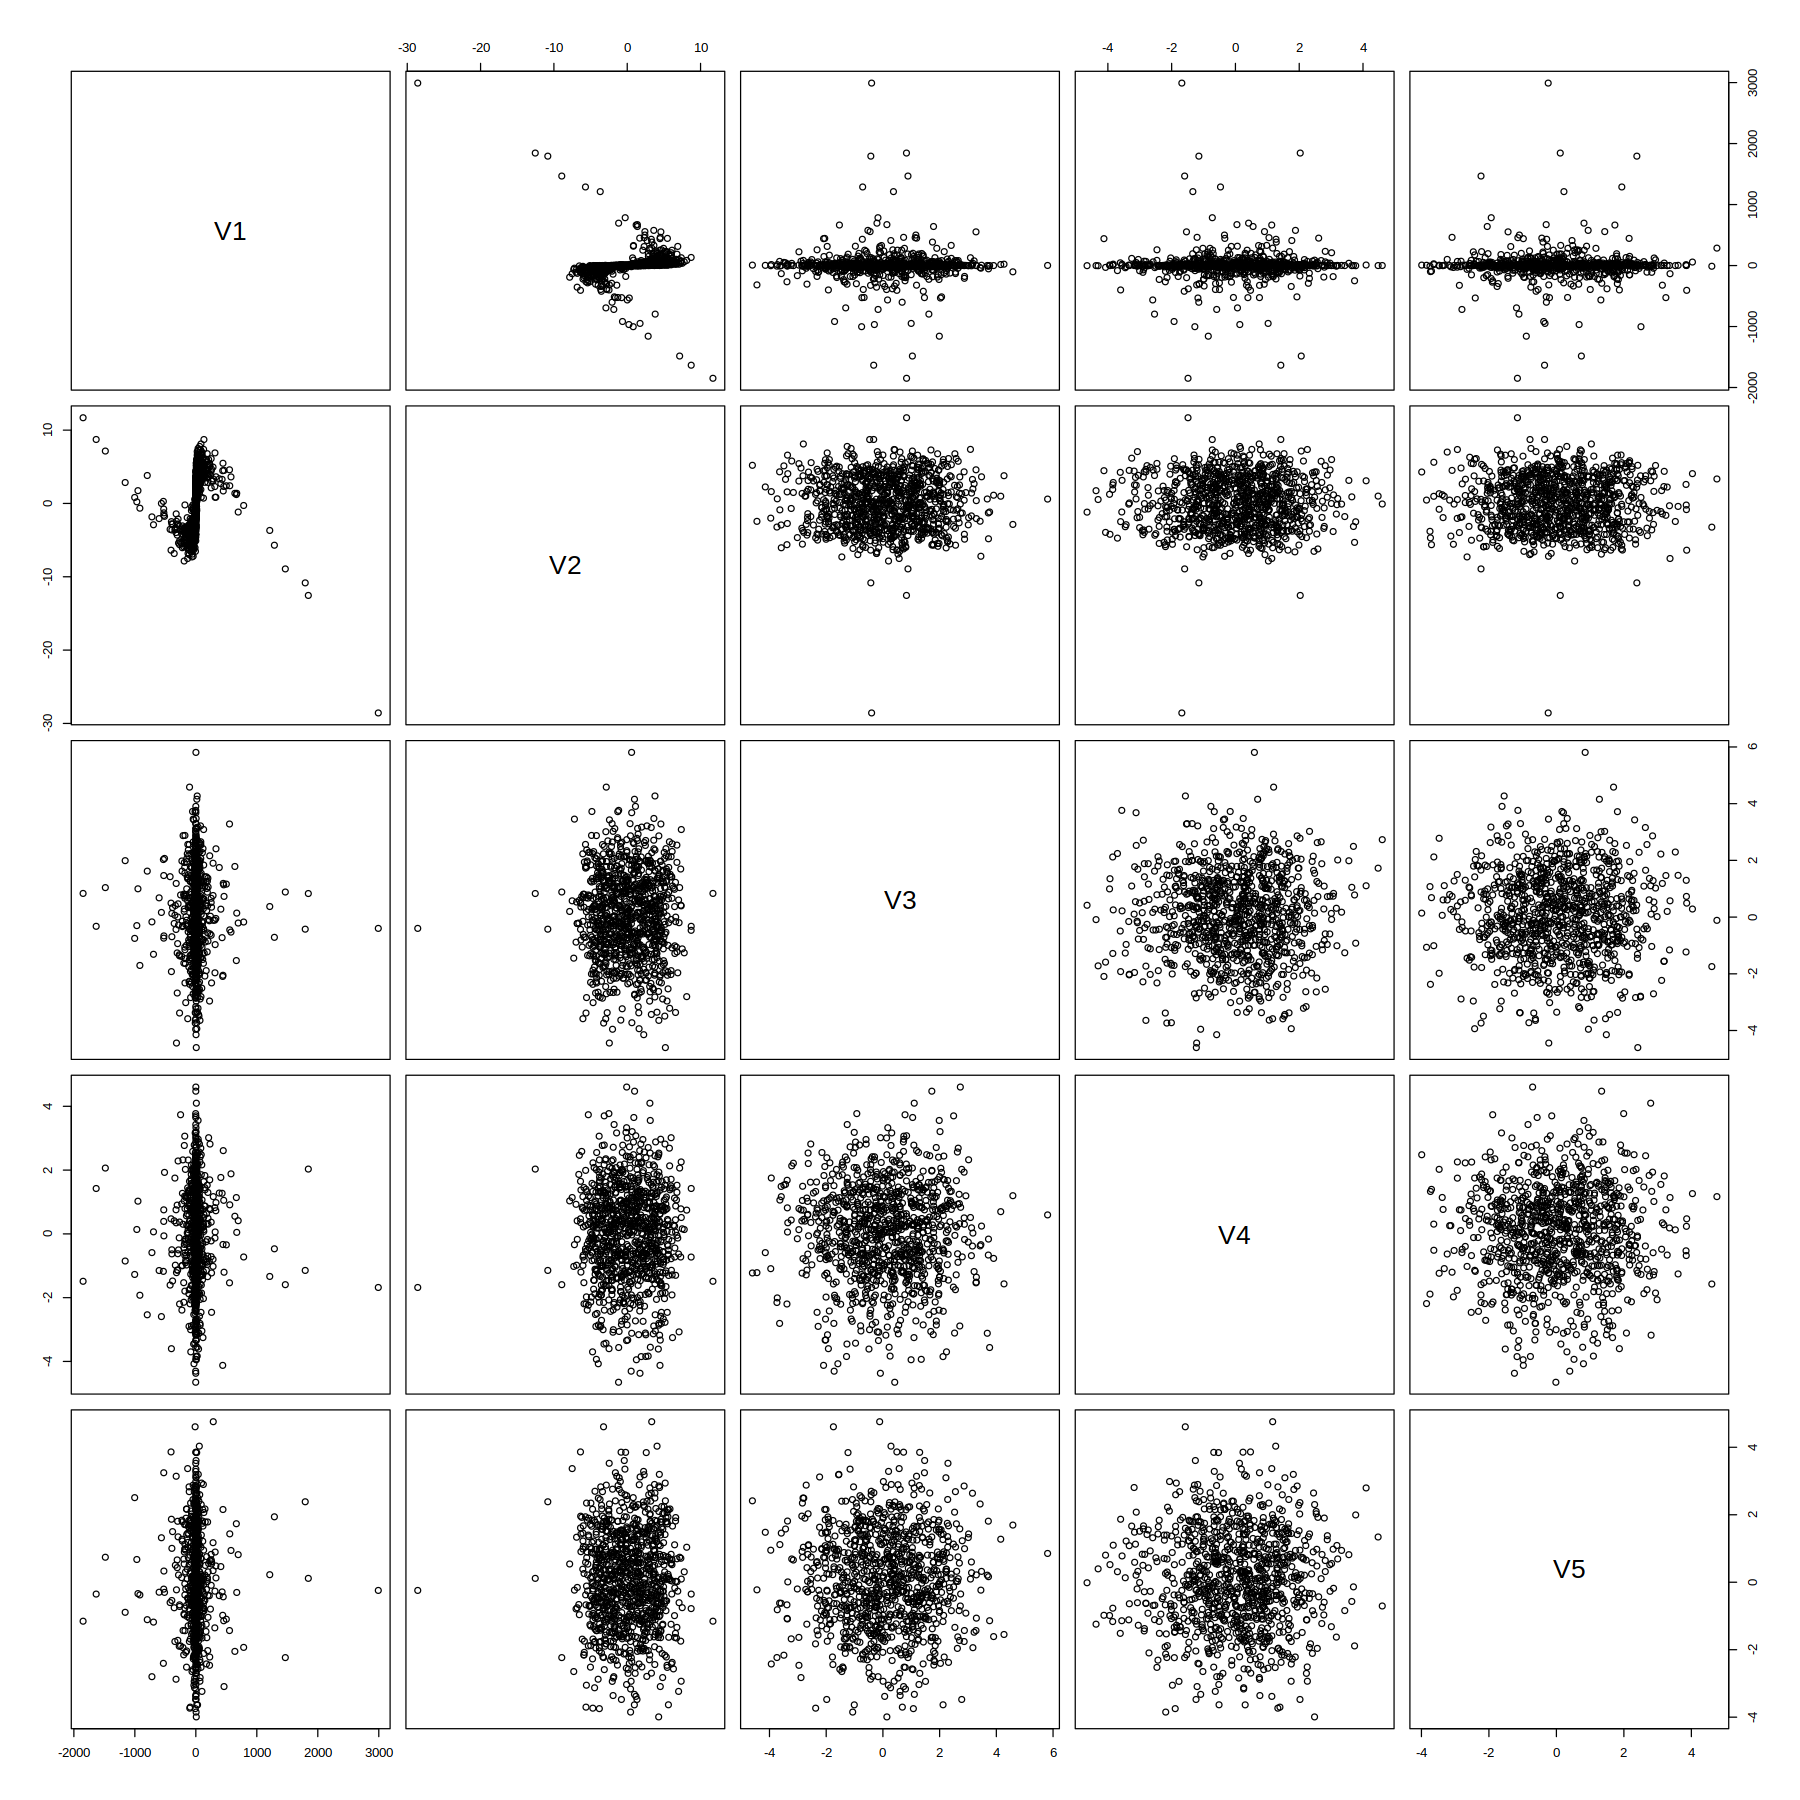

In [145]:
#akurat tutaj mamy dość nieliniowe zależności i wyglądają one dość dziwnie, ale zazwyczaj 
plot(as.data.frame(PCs))

## Regresja i klasyfikacja

### Regresja liniowa

Wracając do nazewnictwa problemów predykcji, niech $Y$ to zmienna decyzyjna, którą chcemy przewidzieć na podstawie predyktorów $X_1, X_2 \dots X_n $.

Podstawową metodą którą powinniście Państwo mieć w statystyce jest **regresja liniowa**, którą akurat stosujemy w przypadku, gdzie $Y$ i i $X_i$ przyjmują wartości ciągłe. Dopasowujemy $\hat{Y}$ do prawdziwych wartości $Y$ na podstawie $X_i$, dobierając wartości współczyniików $w_i$: 

$\large \hat{Y} = (\sum_j w_j X_j) + w_0$



Jeśli mamy $Y$ i tylko jeden $X_1$, to sytuacja znowu jest prosta w interpretacji graficznej - mamy dobry model, jeśli narysujemy wykres punktowy 2D $Y$ oraz $X_1$ i naniesiemy tam $\hat{Y}$. Punkty oryginalnych danych powinny się w miarę pokrywać z modelem (prostą) $\hat{Y}$.

### Klasyfikacja

W naszych danych natomiast $Y$ nie przyjmuje wartości ciągłych. Potrzebna będzie metoda, która przewiduje wartości $0,1$ na podstawie ciągłych $X_i$. Podstawowym podejściem jest wykorzystanie wyników modelu liniowego tak, aby utworzyć klasyfikator (czyli algorytm, który na podstawie ciągłych wartości atrybutów przewidzi dla danej obserwacji klasę decyzyjną $0$ lub $1$).

#### Regresja logistyczna

Najbardziej popularną metodą jest **regresja logistyczna**, która zwraca wartości ciągłe w przedziale $[0,1]$. Jak założymy, że wynik regresji logistycnej to estymowane $p(Y==1 | X_i )$, możemy zrobić klasyfikator, przyjmując jakiś punkt odcięcia:

$$ \large \hat{P}= \frac{e^{w_0 + \sum_j w_j X_j}}{1+ e^{w_0 + \sum_j w_j X_j}} $$

- najpierw obliczamy model liniowy $w_0 + \sum_j w_j X_j$

- potem wkładamy wynik tego do funkcji sigmoidalnej $ \large sigmoid(x)= \frac{exp(x)}{1+exp(x)}$

- w wyniku ostatniego działania, uzyskujemy wartości w przedziale $[0,1]$.

- aby ustalić klasyfikator, przyjmujemy jakiś punkt odcięcia np $0.5$,

- jeżeli dla obserwacji $i$, wynik modelu jest większy to $0.5$, to $\hat{Y}=1$, $0$ inaczej.

**UWAGA:** optymalne dopasowanie współczynników $w_i$  nie jest obliczane jak w regresji liniowej, do tego służą specjalne algorytmy.

**W praktyce:** wywołujemy funkcję w R :)

#### Regresja logistyczna w R

Funkcja `glm` (*general linear model* odpowiednio wywołana) obliczy wszystko, to co trzeba, tylko trzeba wiedzieć, co tam włożyć i co z tego wychodzi.

Spinamy zmienne objaśniające $X_i$ które chcemy użyć oraz zmienną decyzyjną do jednego `data.frame`, i potem wywołujemy `glm` z odpowiednimi argumentami.

In [83]:
#konstruuję zabawkową zmienną decyzyną Y dla przykładu
Y= (X_matrix[,1] + - X_matrix[,2])^(-1) > 0
table(Y)

Y
FALSE  TRUE 
  492   508 

In [93]:
#dla przykładu, zaszumiamy dane

dataSize=length(X_matrix)
dataDim=dim(X_matrix)
Noise<-  rnorm(dataSize,0,4)
dim(Noise)<-dataDim
X_train<- X_matrix + Noise
X_train<- X_train[,1:3]

#### Właściwy kod

In [94]:
logRegData= as.data.frame(cbind(Y, X_train))

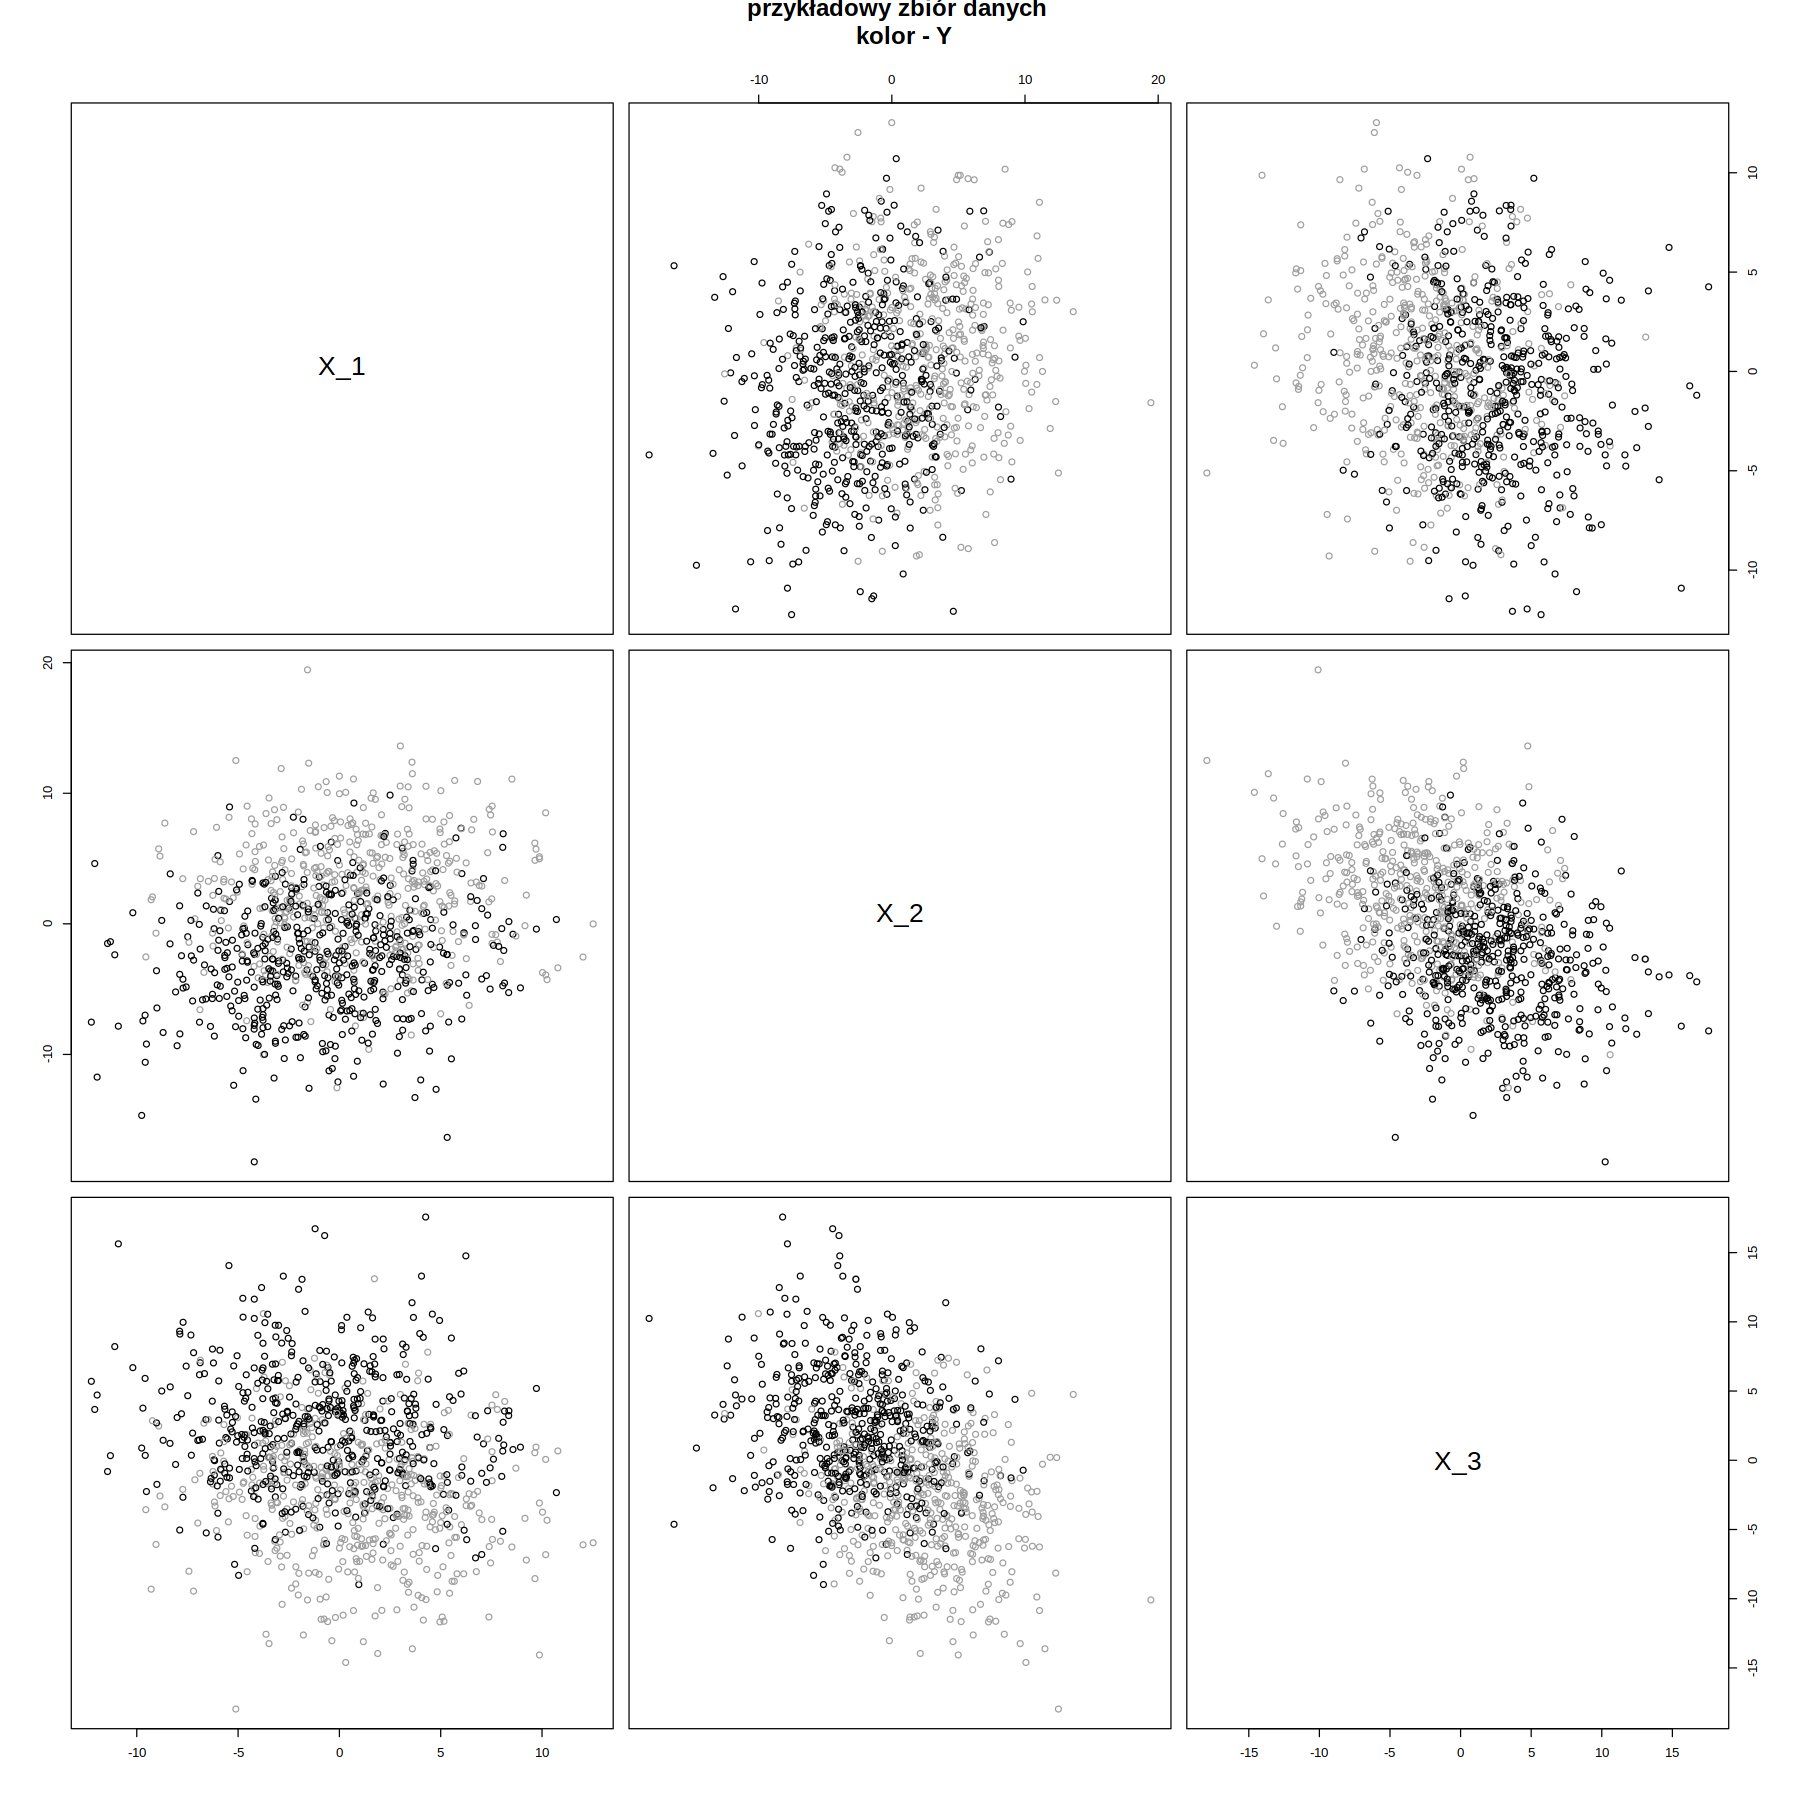

In [95]:
plot(logRegData[,2:ncol(logRegData)],col=Y+16, main= "przykładowy zbiór danych \n kolor - Y")

In [96]:
logreg1 <- glm(Y~., #składnia typowa dla R, formuła opisujaca zależność kolumny Y od reszty
               family=binomial(link='logit'), # żeby była regresja logistyczna
               data=logRegData) # tutaj wkładamy data.frame z danymi

Wyniki działania modelu:

- `Coefficients`: współczynniki $w_i$ wcześniej wspomniane, `Intercept`, współczynnik $w_0$. Interpretacja współczynników pozwala na orzeczenie, które zmienne zwiększają prawdopodobieśtwo $Y=1$ (ich współczynniki są większe niż 0), a które zmniejszają.

- `Estimate`: ich wartość liczbowa

- `Pr(>|z|)`: istoność statystyczna (p-value)

In [99]:
summary(logreg1)


Call:
glm(formula = Y ~ ., family = binomial(link = "logit"), data = logRegData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1532  -0.7265   0.1294   0.7783   2.3273  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.009023   0.081696   0.110   0.9121    
X_1         -0.045086   0.019851  -2.271   0.0231 *  
X_2         -0.227567   0.020814 -10.933   <2e-16 ***
X_3          0.236484   0.022167  10.668   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1386.04  on 999  degrees of freedom
Residual deviance:  917.85  on 996  degrees of freedom
AIC: 925.85

Number of Fisher Scoring iterations: 5


Indeksując obiekt wynikowy jak listę nazwami, dostaniemy się do wielu innych przydatnych informacji.

`fitted.values` - przewidziane prawdopodobieństwa $\hat{P}$. Możemy przyjąć np. punkt odcięcia $0.5$ i dokonać klasyfikacji.

In [101]:
names(logreg1)

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"

In [106]:
Y_daszek = logreg1$fitted.values > 0.5

Wstępna ocena jakości modelu:

In [107]:
table(Y, Y_daszek) #tzw. confusion matrix

       Y_daszek
Y       FALSE TRUE
  FALSE   382  110
  TRUE    104  404

In [108]:
sum(Y==Y_daszek) # liczba poprawnych klasyfikacji


[1] 786

In [109]:
acc= sum(Y==Y_daszek)/ length(Y) # accuracy, procent poprawnych klasyfikacji
acc

[1] 0.786

## Mierzenie jakości klasyfikatorów

Podstawowe miary:

- dokładność (*accuracy (acc)*) = $ \large \frac{\text{liczba poprawnie zaklasyfikowanych przypadków}}{\text{liczba obserwacji} } $

- czułość (*sensivity* lub *true positive rate (TPR)*) = $ \large \frac{\text{liczba obserwacji, gdzie $Y==1$ oraz $\hat{Y}==1$}}{\text{liczba obserwacji, gdzie $Y==1$ } } $ (dobrze jak duże)

- odsetek przypadków fałszywie pozytywnych (*false positive rate (FPR)*) = $ \large \frac{\text{liczba obserwacji, gdzie $Y==0$ oraz $\hat{Y}==1$}}{\text{liczba obserwacji, gdzie $Y==0$} } $ (obrze jak małe)


**Po co:** sama dokładność może być myląca: rozpatrzmy przykład, gdzie mamy takie $Y$, że jest 10 obserwacji $Y==1$, oraz 90 obserwacji, gdzie $Y==0$, a klasyfikator $\hat{Y}$ zawsze zwraca $0$.

$ acc = \frac{90}{100}=0.9$

$ FPR = \frac{0}{90}=0 $

$ TPR = \frac{0}{10}=0 $

Pod względem np. $TPR$ widać już, że klasyfikator wypada fatalnie. Poza tym, prawdopdobnie jest mało przydatny i nic się nie nauczył (po co mi stosować algorytm uczenia maszynowego który i tak jedyne co zrobi to zwraca zawsze stałą wartość ? :) )

Pomimo, że sam problem jest dość prosty (albo dobrze zgadliśmy, albo nie), w praktyce robi się dość złożone, jak jednoznacznie ocenić, czy klasyfikator dobrze działa:

https://en.wikipedia.org/wiki/Confusion_matrix#Table_of_confusion

### Ustalanie punktu odcięcia

Dużo algorytmów uczenia maszynowego zwraca wartości w przedziale $[0,1]$ i używamy ich do klasyfikacji wybierając punkt odcięcia, jak w poprzednich przykładach z regresji logistycznej. Ogólną dobrość dopasowania klasyfikatora określa krzywa $ROC$, czyli najprościej mówiąc, zależność $TPR, FPR$ od przyjętego punktu odcięcia $t$. 

Na osi $x$ mamy $FPR$, na osi $y$ $TPR$, a dany punkt odpowiada danej wartości $t$ od $0$ do $1$. 

Krzywą rysujemy "od prawej do lewej"- wartość $t=0$ odpowiada punktowi w prawym górnym rogu, im większe $t$ tym punkt jest bardziej na prawo.

Im krzywej bliżej do lewego górnego rogu, tym lepiej. Jak krzywa jest prostą- klasyfikator jest słaby, równie dobrze moglibyśmy losować klasę decyzyjną.

Jak krzywa jest przy prawym dolnym rogu - klasyfikator zgaduje "odwrotnie" (czyli uczy się na odwrót- mimo wszystko jest przydatny, musimy tylko odwrócić klasy decyzyjne, które przewiduje)

![foo](https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/1024px-Roc_curve.svg.png)